# **Neural Networks with Keras**

We are going to use Keras to recognize digits (0-9). Feedforward Neural Networks will be attempted first, followed by Convolutional Neural Networks

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from itertools import product
from scipy import optimize
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras import utils

%matplotlib inline

## Apply Neural Networks to Digits Dataset

In [0]:
# starter code 
digits = load_digits()

In [21]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [22]:
for key, value in digits.items():
    print(key, value[0])

data [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
target 0
target_names 0
images [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
DESCR .


In [23]:
pd.Series(digits.target).value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [24]:
len(digits.data)

1797

In [0]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [26]:
range(X_train.shape[0])

range(0, 1437)

In [27]:
print(X_train.shape)

(1437, 64)


[1344 1130  373  251  305 1207]


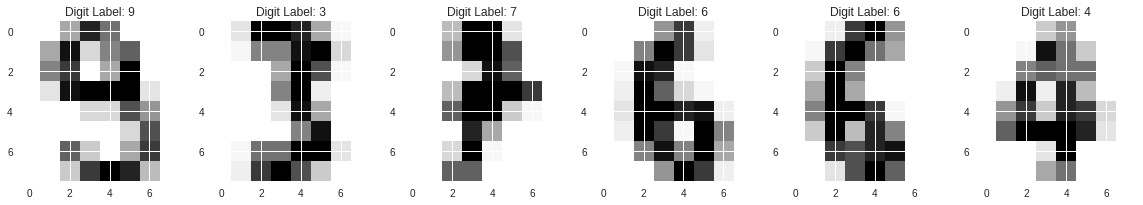

In [32]:
# # Pick 6 random digit data to display
viz_data = np.random.choice(range(X_train.shape[0]), 6)
print(viz_data)
fig = plt.figure(figsize=(20, 20))
for idx, img in enumerate(viz_data):
    fig.add_subplot(1, 6, idx+1)
    plt.imshow(X_train[img].reshape(8, 8))
    plt.title("Digit Label: {}".format(y_train[img]))

In [0]:
# normalizing the dataset 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [13]:
#Let's see how good is Logistic Regression
logit = LogisticRegression()
logit.fit(X_train, y_train)
print ("Logistic Regression Accuracy: {}".format(logit.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Accuracy: 0.9611111111111111


### MLPClassifier (Scikit Learn) way:

In [14]:
#Let's review how MLPClassifier got trained and do prediction
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)
mlp = MLPClassifier(600,'relu') #fill in more code from here
mlp.fit(X_train,y_train)
score = mlp.score(X_test,y_test)
print("MLP score", score)

MLP score 0.9888888888888889


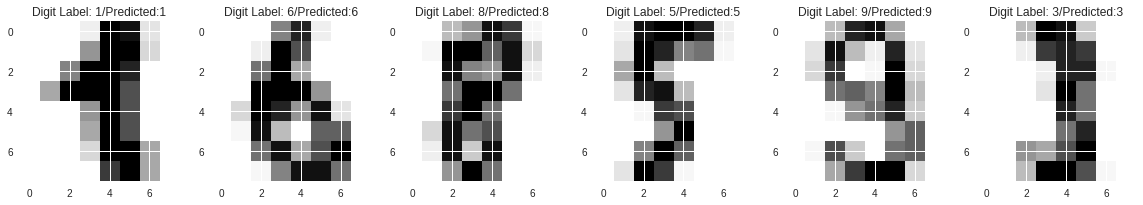

In [15]:
y_predict = mlp.predict(X_test)

# let's visualize the predicted result
#fill in your code here

viz_data = np.random.choice(range(X_test.shape[0]), 6)
fig = plt.figure(figsize=(20, 20))
for idx, img in enumerate(viz_data):
    fig.add_subplot(1, 6, idx+1)
    plt.imshow(X_test[img].reshape(8, 8))
    
    plt.title("Digit Label: {}/Predicted:{}".format(y_test[img],y_predict[img]))

# **Keras**

### Let's tranform the output to one-hot-encoding

In [16]:
y_train_c = utils.to_categorical(y_train, num_classes=10)
y_test_c = utils.to_categorical(y_test, num_classes=10)
print('original y_train size:',y_train.shape,'transformed y_train shape:', y_train_c.shape)

original y_train size: (1437,) transformed y_train shape: (1437, 10)


In [17]:
# create a feedforward model
model = Sequential()
input_size =X_train.shape[1]
# model.add(Dense(17, input_shape=(input_size,), init='uniform',activation='relu'))
model.add(Dense(input_size*3, input_dim=input_size, init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(192, input_dim=64, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="sigmoid", kernel_initializer="uniform")`
  """


In [18]:
input_size

64

In [16]:
# Fit the model
history = model.fit(X_train, y_train_c, validation_data=(X_test, y_test_c),epochs=30, batch_size=20,  verbose=0);

Instructions for updating:
Use tf.cast instead.


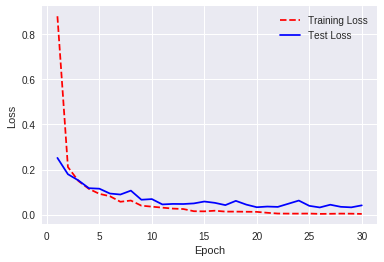

In [37]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [42]:
predictions = model.predict(X_test)
score =model.evaluate(X_test, y_test_c, batch_size=20,  verbose=0)
print('prediction score: %.2f%%, %.2f%%' % (score[1]*100, score[0]*100)  )

prediction score: 98.06%, 4.09%


In [41]:
# change the output back to one vector column
predictions_in_one = (np.argmax(predictions,axis=1))
print('original prediction shape:',predictions.shape,'\ntransformed prediction shape:', predictions_in_one.shape)

original prediction shape: (360, 10) 
transformed prediction shape: (360,)


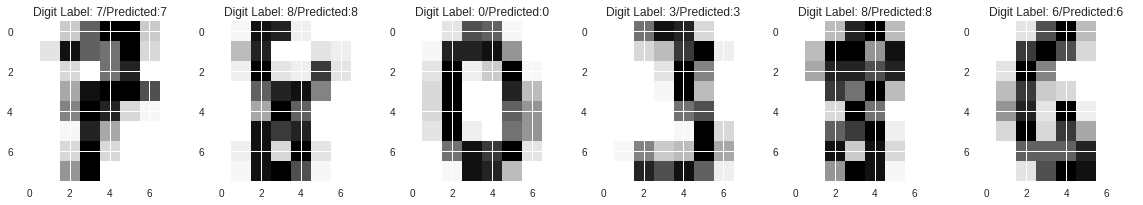

In [44]:
# let's visualize the predicted result
viz_data = np.random.choice(range(X_test.shape[0]), 6)
# fill in your code here
viz_data = np.random.choice(range(X_test.shape[0]), 6)
fig = plt.figure(figsize=(20, 20))
for idx, img in enumerate(viz_data):
    fig.add_subplot(1, 6, idx+1)
    plt.imshow(X_test[img].reshape(8, 8))
    
    plt.title("Digit Label: {}/Predicted:{}".format(y_test[img],predictions_in_one[img]))

# **Convolutional Neural Network**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 8, 8).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 8, 8).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
#One hot encoding
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [46]:
#Note we have one-hot-encoding for output now
y_train.shape

(1437, 10)

In [47]:
#X is now 4-D
X_train.shape[0:]

(1437, 1, 8, 8)

In [0]:
# Convolutional Neural Network
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D,MaxPooling1D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


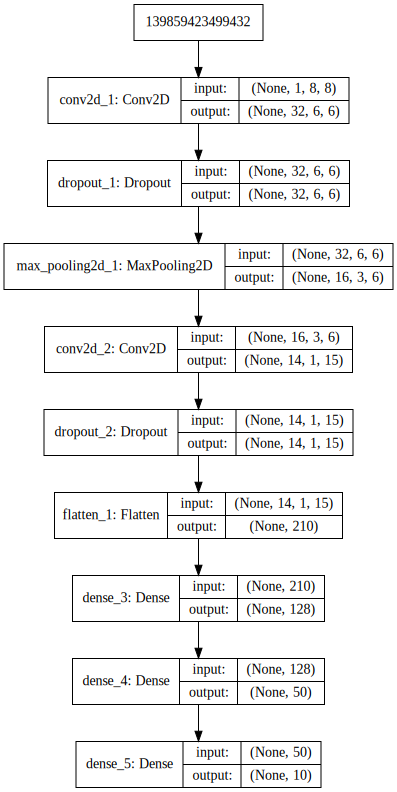

In [49]:
# create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',data_format = 'channels_first',
               input_shape=X_train.shape[1:]))
model.add(Dropout(0.2)) # regularization(reduce over fitting)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))#try adding few more Dense layers
model.add(Dense(num_classes, activation='sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Visualize network architecture
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=0)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 80.83%


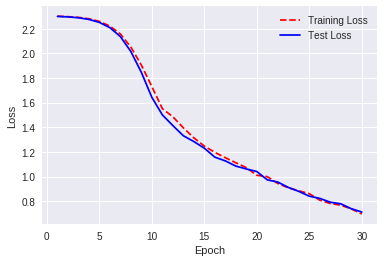

In [51]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

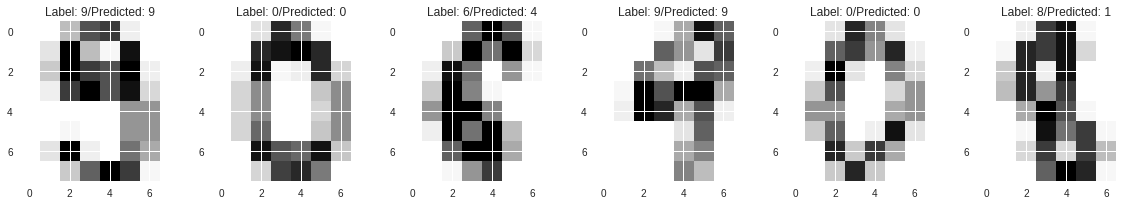

In [52]:
y_predict = model.predict(X_test)
# let's visualize the predicted result
viz_data = np.random.choice(range(X_test.shape[0]), 6)
fig = plt.figure(figsize=(20, 20))
for idx, img in enumerate(viz_data):
    fig.add_subplot(1, 6, idx+1)
    plt.imshow(X_test[img].reshape(8, 8))
    plt.title("Label: {}/Predicted: {}".format(np.argmax(y_test[img]),np.argmax(y_predict[img])))